<a href="https://colab.research.google.com/github/NandiniLReddy/yolo11Review/blob/main/Yolo11Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yolo11 Deployment by Nandini Lokesh Reddy


In [ ]:
%pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Detection

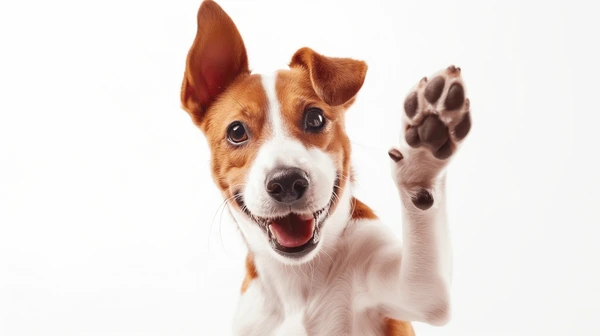

In [ ]:
from IPython.display import Image as IPyImage
IPyImage(filename=f"/content/DOG.png", width=500)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model=YOLO('yolo11n.pt')
image = Image.open("/content/DOG.png")
result = model.predict(image, conf=0.25)[0]

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.6MB/s]



0: 384x640 1 dog, 309.6ms
Speed: 25.5ms preprocess, 309.6ms inference, 26.6ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
!yolo task = detect mode=predict model=yolo11n.pt conf=0.25 source="/content/DOG.png" save=True

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/DOG.png: 384x640 1 dog, 148.9ms
Speed: 4.4ms preprocess, 148.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# custom data training

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("project-fish-eqo9c").project("fish-species-identification")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fish-Species-Identification--3 in yolov11:: 100%|██████████| 4396/4396 [00:01<00:00, 2884.72it/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data="/content/Fish-Species-Identification--3/data.yaml" epochs=10 imgsz=640 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 132MB/s] 
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Fish-Species-Identification--3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, s

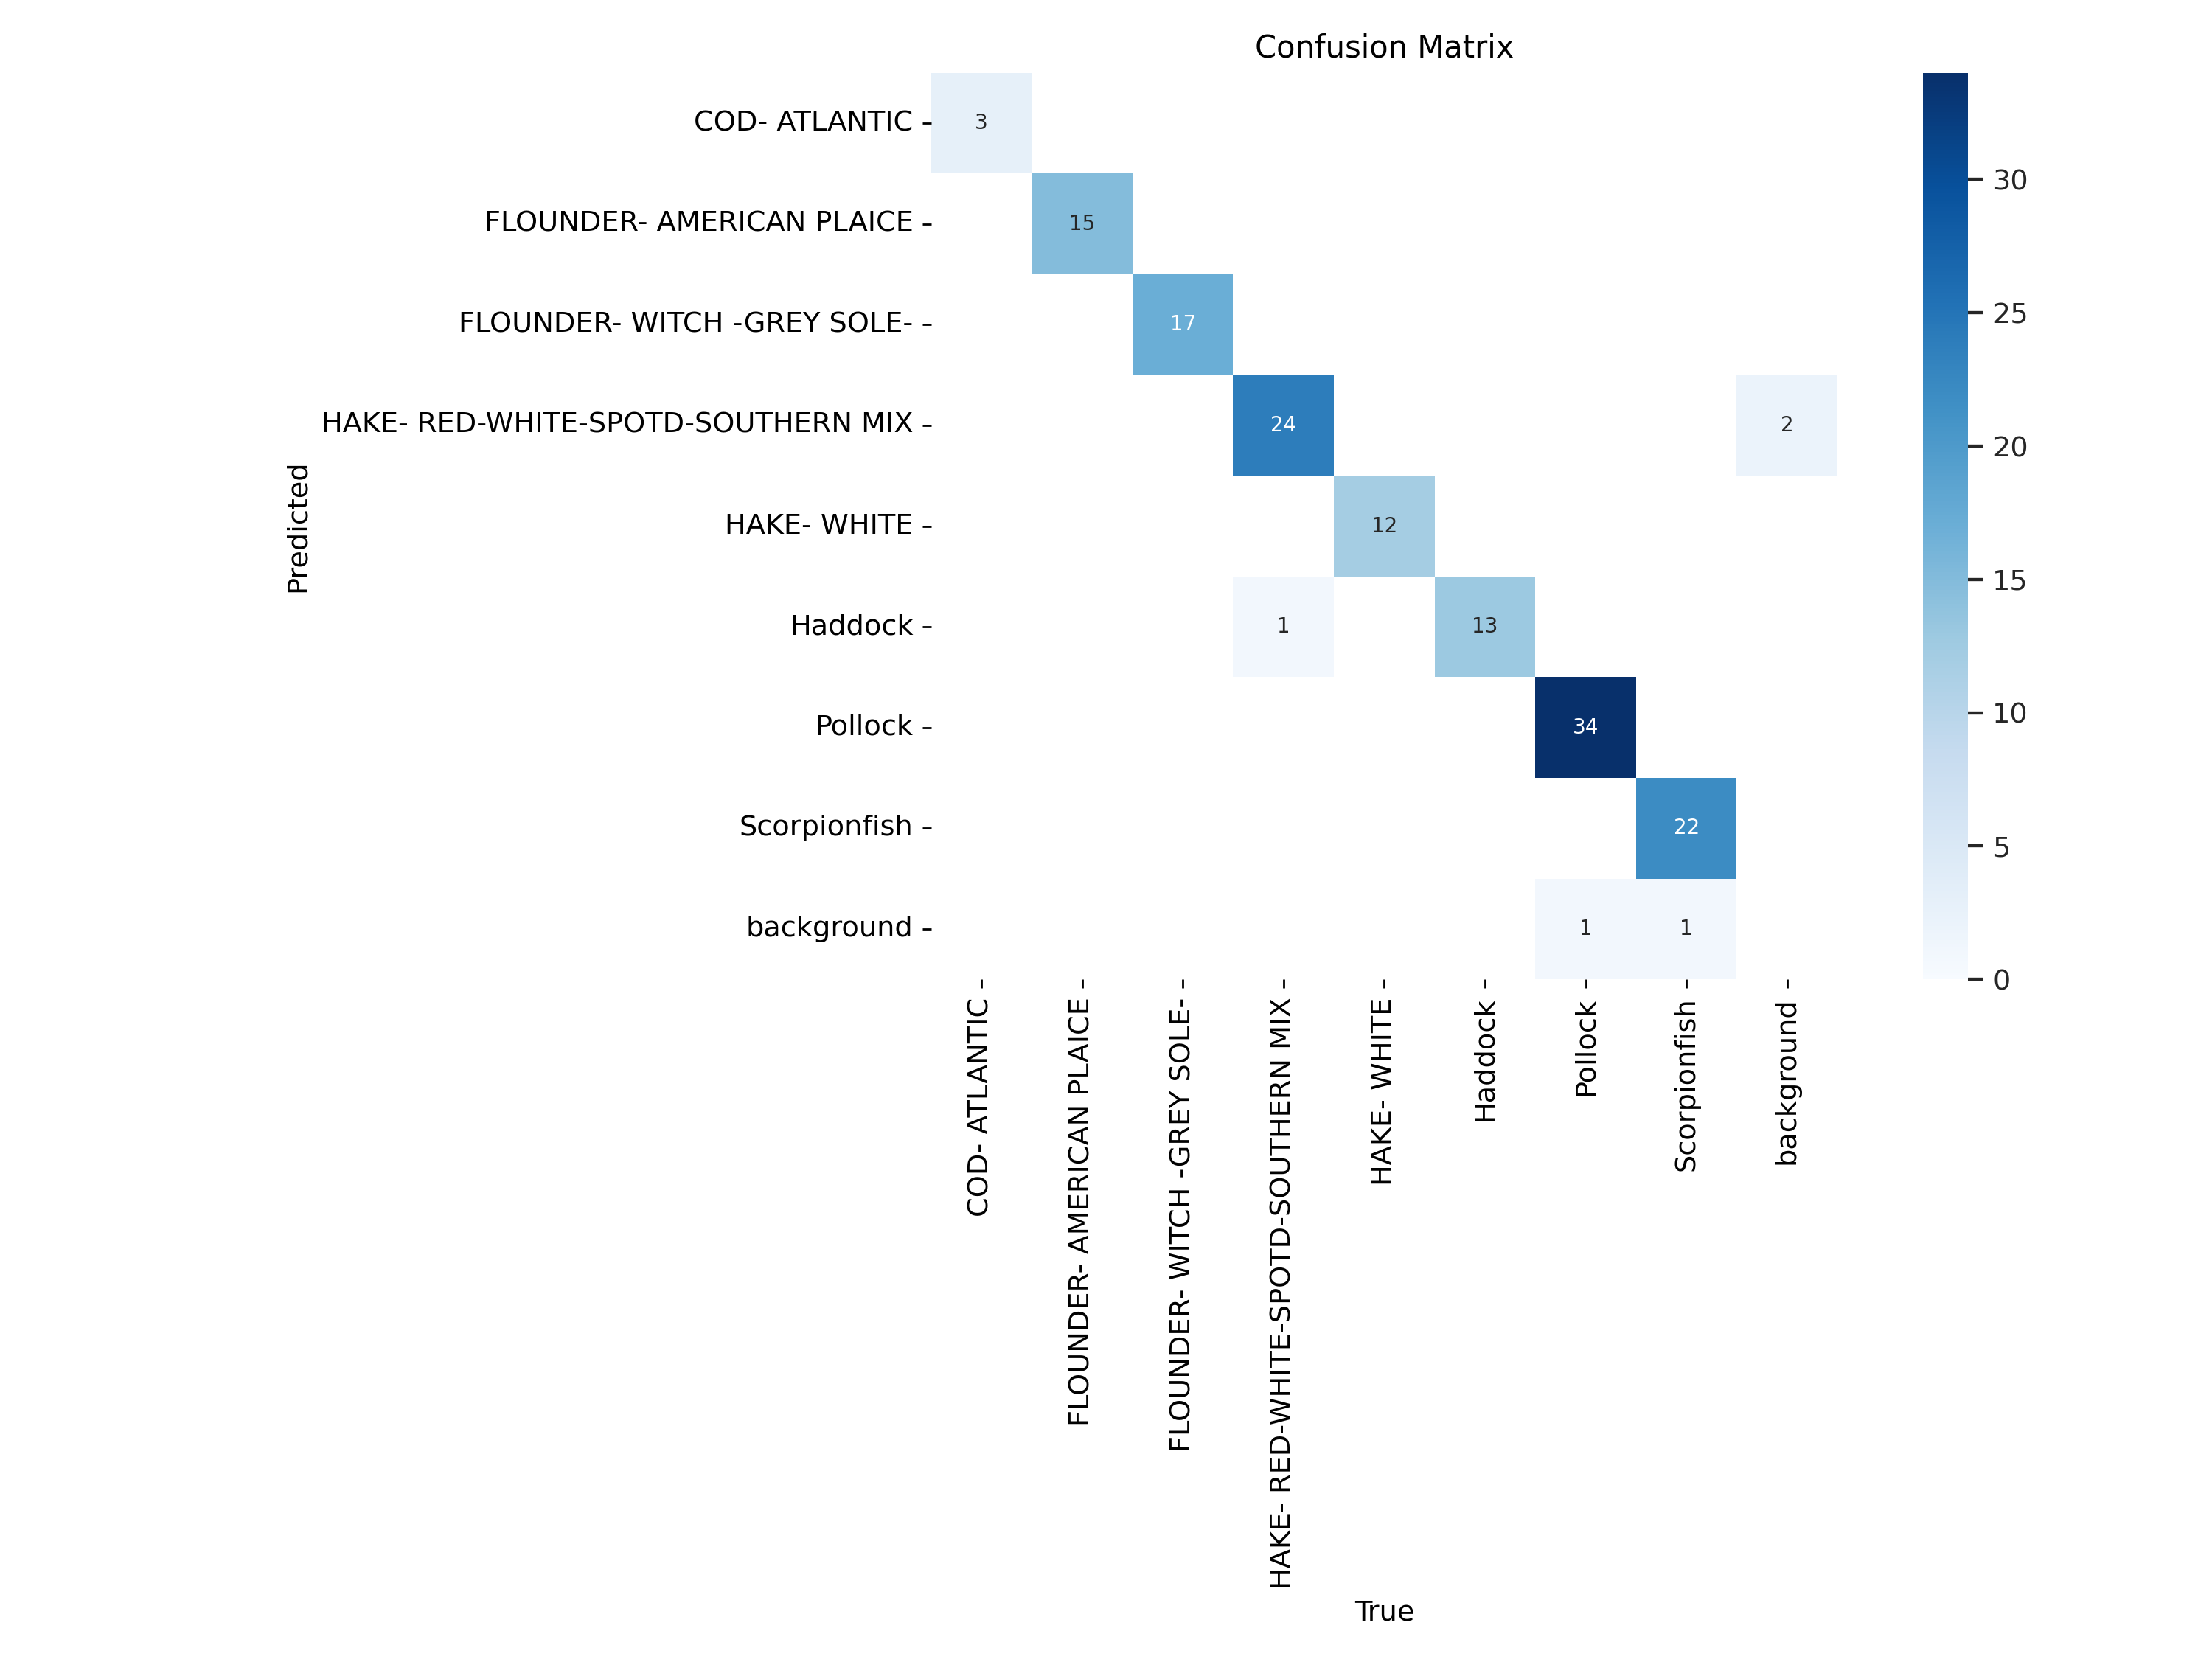

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename="/content/runs/detect/train/confusion_matrix.png", width=800)

In [ ]:
!yolo task = detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/Fish-Species-Identification--3/test/images/Screenshot-2024-08-13-at-12-43-05-AM_png.rf.c32e89ac833f03fae2529abfe67460ca.jpg" save=True

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/Fish-Species-Identification--3/test/images/Screenshot-2024-08-13-at-12-43-05-AM_png.rf.c32e89ac833f03fae2529abfe67460ca.jpg: 384x640 1 FLOUNDER- AMERICAN PLAICE, 50.7ms
Speed: 2.3ms preprocess, 50.7ms inference, 581.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## segmentation


image 1/1 /content/yogapose.jpg: 448x640 1 person, 89.6ms
Speed: 4.0ms preprocess, 89.6ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)


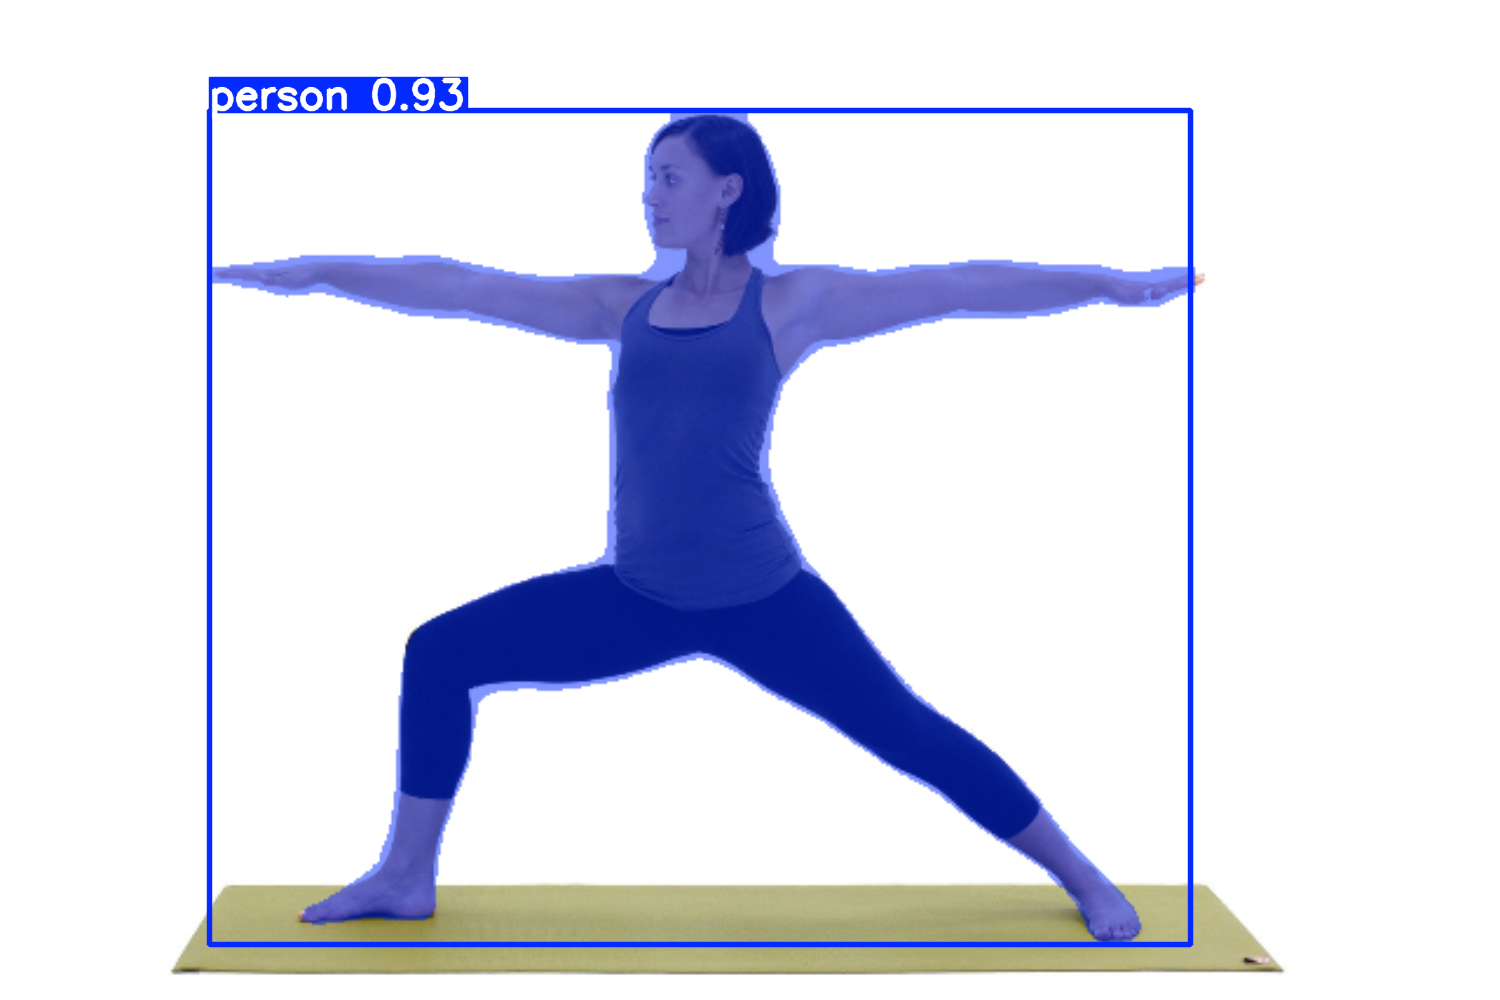

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-seg.pt")

seg_results = model("/content/yogapose.jpg")

seg_results[0].show()

## pose estimation

100%|██████████| 5.97M/5.97M [00:00<00:00, 160MB/s]



image 1/1 /content/yogapose.jpg: 448x640 1 person, 22.3ms
Speed: 2.5ms preprocess, 22.3ms inference, 37.9ms postprocess per image at shape (1, 3, 448, 640)


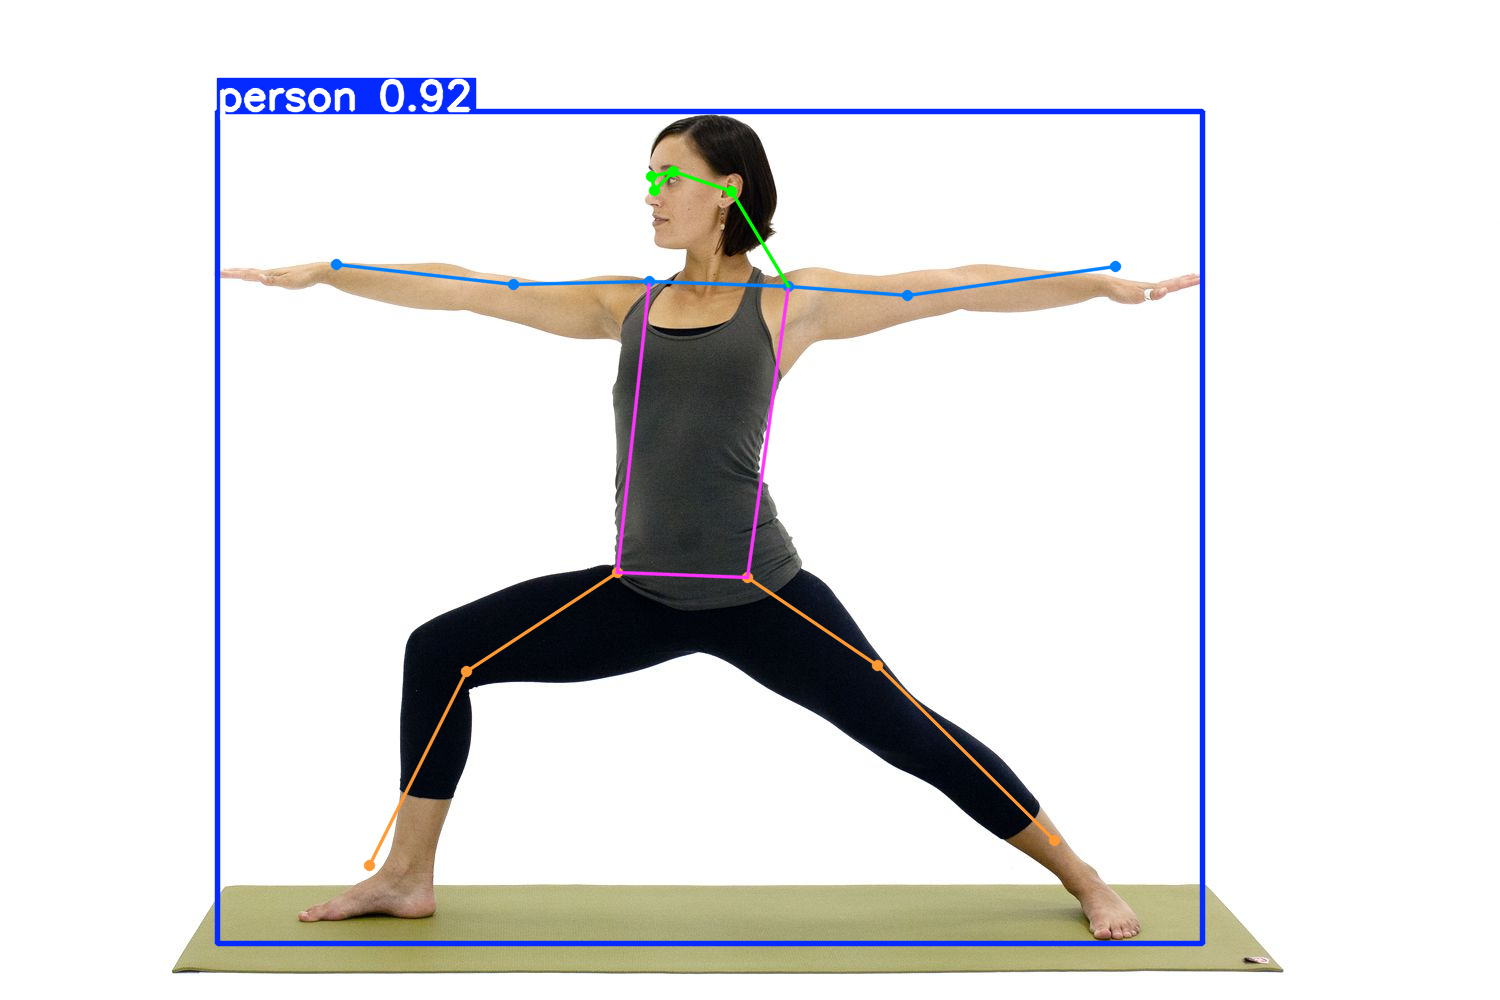

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-pose.pt")

pose_results = model("/content/yogapose.jpg")

pose_results[0].show()

## classification


image 1/1 /content/cocoimage1.jpg: 224x224 carbonara 0.21, plate 0.17, hotdog 0.11, Dungeness_crab 0.10, burrito 0.04, 11.6ms
Speed: 8.4ms preprocess, 11.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


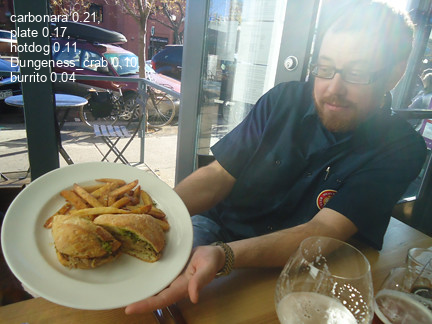

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

classi_results = model("/content/cocoimage1.jpg")

classi_results[0].show()

## Oriented Object Detection

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-obb.pt")

obb_results = model("/content/vecteezy_busy-traffic-on-the-highway_6434705.mp4", save=True)


100%|██████████| 5.53M/5.53M [00:00<00:00, 169MB/s]




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1500) /content/vecteezy_busy-traffic-on-the-highway_6434705.mp4: 576x1024 (no detections), 84.9ms
video 1/1 (frame 2/1500) /content/vecteezy_busy-traffic-on-the-highway_6434705.mp4: 576x1024 (no detections), 20.9ms
video 1/1 (frame 3/1500) /content/vecteezy_busy-traffic-on-the-highway_6434705.mp4: 576x1024 (no detections), 13.0ms
video 1/1 (frame 4/1500) /content/vecteezy_busy-traffic-on-the-highway_6434705.mp4: 576x1024 (no detectio